In [1]:
import math
from random import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pdb

/Users/armaangoel/.local/share/virtualenvs/Clustering-wcG5dRBm/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [69]:
class clusterer:
    def __init__(self, clusters, data):
        self.centroids = [centroid(clusterer.data_range(data)[0], clusterer.data_range(data)[1]) for cluster in range(clusters)]
        self.data = data
        
    def data_range(data):
        mins = [np.min(data[ind]) for ind in range(len(data))]    
        maxs = [np.max(data[ind]) for ind in range(len(data))] 
        return mins, maxs
    
    
    def e_all(self):
        cts = self.centroids
        data = self.data
        
        result = []
        
        dist_tot = 0
        
        for ind in range(len(data[0])):
            mini_ind = 0
            mini = cts[0].dist(np.swapaxes(data,0,1)[ind])
    
            for ct_ind in range(1,len(cts)):
                dist = cts[ct_ind].dist(np.swapaxes(data,0,1)[ind])
                if dist < mini:
                    mini_ind = ct_ind
                    mini = dist
            
            result.append(mini_ind)
            
        return result
    
    def m_all(self, result):
        cts = self.centroids
        data = self.data
        
        for ind, ct in enumerate(cts):
            input_data = np.array([np.swapaxes(data,0,1)[pot_ind] for pot_ind in range(len(result)) if result[pot_ind] == ind])   
            if input_data != []:
                input_data = np.swapaxes(input_data,0,1)
                cts[ind].m(input_data)                       
    
    def update(self):
        cts = self.centroids
        data = self.data
        
        result = self.e_all()
        self.m_all(result)
        
        return cts
                          
    def fit(self, iters):
        data = self.data
        cts = self.centroids
                
        for val in range(iters):
            self.update()
                        
    
    def plot(self):
        data = self.data
        cts = self.centroids
        
        plt.scatter(data[0],data[1])


        for ct in cts:
            plt.scatter(ct.coords[0], ct.coords[1])

In [70]:
class centroid:
    def __init__(self, mins, maxs):
        self.coords = [random()*(maxs[ind]-mins[ind]) + mins[ind] for ind, mini in enumerate(mins)]
    
    def dist(self, data):
        sum_sqd_diff = [np.square(data[ind] - self.coords[ind]) for ind, coord in enumerate(self.coords)]
        sum_sqd_diff = np.sum(sum_sqd_diff)
        return np.sqrt(sum_sqd_diff)
    
    def m(self, data):
        self.coords = [np.average(data[dim]) for dim in range(len(data))]        

In [71]:
data = pd.read_csv('data.csv')
x = data['V1'].values
y = data['V2'].values

data = np.array([x,y])

In [72]:
ctr = clusterer(clusters=3, data=data)

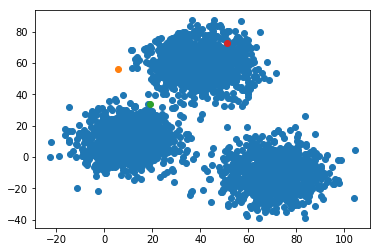

In [73]:
ctr.plot()

In [74]:
ctr.fit(iters=30)

/Users/armaangoel/.local/share/virtualenvs/Clustering-wcG5dRBm/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


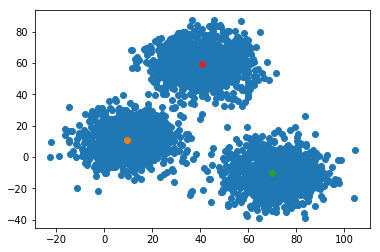

In [75]:
ctr.plot()